In [1]:
%matplotlib inline
# Load necessary modules
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col
import pandas as pd
import scipy.stats as stats
from tqdm import tqdm
import logging
import matplotlib.cm as cm


logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/'

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45265,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:43737,Total threads: 4
Dashboard: /proxy/42743/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:33965,


In [3]:
chunk = {'yu_ocean':52, 'xu_ocean':1200}
# Load the along-slope velocity field
u_along = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/Binned_ASC_speed/OM2_IAF/Binned_Antarctic_slope_contour_1km_velocities*')
# Load CSHT field
CSHT_along = xr.open_mfdataset(\
    '/g/data/v45/wf4500/ASC_project_files/Cross_slope_heat_transport/OM2_IAF/daily_z/*')

0.3.0


In [54]:
u_along_da_monthly

<xarray.DataArray 'u_along_contour_binned' (time: 732, st_ocean: 75,
                                            lon_bin_midpoints: 1428)>
array([[[-0.02359511, -0.02475564, -0.02657239, ..., -0.0204653 ,
         -0.02053152, -0.02350026],
        [-0.01865366, -0.01979311, -0.02162974, ..., -0.01303114,
         -0.01375674, -0.01694079],
        [-0.01603528, -0.01716227, -0.01901062, ..., -0.00900011,
         -0.0100713 , -0.01337444],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.06889385, -0.06873107, -0.06851074, ..., -0.02077237,
         -0.02169113, -0.02693162],
        [-0.06278588, -0.06240495, -0.06204439, ..., -0.01473967,
         -0.01655271, -0.02205193],
        [-0.05906674, -0.05856833, -0.05814252, ..., -0.01109173,
         -0.01338399, -0.0190114 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.0376156 , -0.03683981, -0.03611625, ..., -0.03758969,
         -0.03398371, -0.03630787],
        [-0.03121829, -0.0303874 , -0.02965705, ..., -0.0294911 ,
         -0.02702347, -0.02966545],
        [-0.02686711, -0.02600385, -0.02527127, ..., -0.02429345,
         -0.0225731 , -0.02540491],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * st_ocean           (st_ocean) float64 0.5413 1.681 ... 5.511e+03 5.709e+03
  * lon_bin_midpoints  (lon_bin_midpoints) float64 -278.5 -278.2 ... 78.0 78.25
  * time               (time) datetime64[ns] 1958-01-31 ... 2018-12-31

In [4]:
# Average U_along into mean, seasonal, monthly and annual fields

u_along_da_mean = u_along.mean('time').u_along_contour_binned
u_along_da_seasonal = u_along.groupby('time.month').mean('time').u_along_contour_binned
u_along_da_annual = u_along.groupby('time.year').mean('time').u_along_contour_binned
## CHECK: Is this the right way? 
u_along_da_monthly = u_along.resample(time='1M').mean().u_along_contour_binned

u_along_da_mean.load()
u_along_da_seasonal.load()
u_along_da_annual.load()
u_along_da_monthly.load()

<xarray.DataArray 'u_along_contour_binned' (time: 732, st_ocean: 75,
                                            lon_bin_midpoints: 1428)>
array([[[-0.02359511, -0.02475564, -0.02657239, ..., -0.0204653 ,
         -0.02053152, -0.02350026],
        [-0.01865366, -0.01979311, -0.02162974, ..., -0.01303114,
         -0.01375674, -0.01694079],
        [-0.01603528, -0.01716227, -0.01901062, ..., -0.00900011,
         -0.0100713 , -0.01337444],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.06889385, -0.06873107, -0.06851074, ..., -0.02077237,
         -0.02169113, -0.02693162],
        [-0.06278588, -0.06240495, -0.06204439, ..., -0.01473967,
         -0.01655271, -0.02205193],
        [-0.05906674, -0.05856833, -0.05814252, ..., -0.01109173,
         -0.01338399, -0.0190114 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.0376156 , -0.03683981, -0.03611625, ..., -0.03758969,
         -0.03398371, -0.03630787],
        [-0.03121829, -0.0303874 , -0.02965705, ..., -0.0294911 ,
         -0.02702347, -0.02966545],
        [-0.02686711, -0.02600385, -0.02527127, ..., -0.02429345,
         -0.0225731 , -0.02540491],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * st_ocean           (st_ocean) float64 0.5413 1.681 ... 5.511e+03 5.709e+03
  * lon_bin_midpoints  (lon_bin_midpoints) float64 -278.5 -278.2 ... 78.0 78.25
  * time               (time) datetime64[ns] 1958-01-31 ... 2018-12-31

(50, 1428)


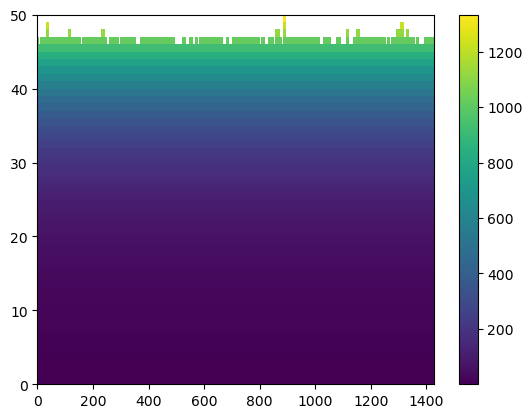

In [74]:
# save depth coordinate to use in the last plot

depthT = u_along_da_mean.st_ocean
depthT = depthT.expand_dims(dim={'lon_bin_midpoints':u_along_da_mean.lon_bin_midpoints.size},axis=1)\
.assign_coords({'lon_bin_midpoints':u_along_da_mean.lon_bin_midpoints})
depthT = (depthT*u_along_da_mean/u_along_da_mean).rename('depth')
# remove last 25 layers
depthT=depthT[0:50,:]

plt.pcolormesh(depthT)
plt.colorbar()

print(depthT.shape)

In [66]:
## GMM doesn't accept any NaNs - so, we need to drop all NaNs in depth space and normalise onto a sigma co-ordinate (between 0 and 1)
depths_2d_da = u_along_da_mean.st_ocean
depths_2d_da = depths_2d_da.expand_dims(dim={'lon_bin_midpoints':u_along_da_mean.lon_bin_midpoints.size},axis=1)\
.assign_coords({'lon_bin_midpoints':u_along_da_mean.lon_bin_midpoints})
depths_2d_da = (depths_2d_da*u_along_da_mean/u_along_da_mean).rename('depth')

# Calculate the values of M and O, the columns and rows of U_along
n_rows = u_along_da_mean.shape[0]
o_cols = u_along_da_mean.shape[1]
m_rows = n_rows // o_cols

reshaped_u_along_df_season = []
reshaped_u_along_df_annual = []
reshaped_u_along_df_monthly = []

# Reshape the DataFrame to an MxO shape, and drop NaNs from the depth axis
reshaped_u_along_df = pd.DataFrame(np.array(u_along_da_mean).reshape(n_rows, o_cols), index=u_along_da_mean.st_ocean, columns=u_along_da_mean.lon_bin_midpoints)
reshaped_u_along_df = reshaped_u_along_df.dropna(how='all', axis=0)
for i in tqdm(range(12)):
    tmp = (pd.DataFrame(np.array(u_along_da_seasonal)[i,:,:].reshape(n_rows, o_cols), index=u_along_da_seasonal.st_ocean, columns=u_along_da_seasonal.lon_bin_midpoints))
    reshaped_u_along_df_season.append(tmp.dropna(how='all', axis=0))
for i in tqdm(range(u_along_da_annual.year.size)):
    tmp = (pd.DataFrame(np.array(u_along_da_annual)[i,:,:].reshape(n_rows, o_cols), index=u_along_da_annual.st_ocean, columns=u_along_da_annual.lon_bin_midpoints))
    reshaped_u_along_df_annual.append(tmp.dropna(how='all', axis=0))
for i in tqdm(range(u_along_da_monthly.time.size)):
    tmp = (pd.DataFrame(np.array(u_along_da_monthly)[i,:,:].reshape(n_rows, o_cols), index=u_along_da_monthly.st_ocean, columns=u_along_da_monthly.lon_bin_midpoints))
    reshaped_u_along_df_monthly.append(tmp.dropna(how='all', axis=0))

## Do the same for the depth array
reshaped_depths_df = pd.DataFrame(np.array(depths_2d_da).reshape(n_rows, o_cols), index=u_along_da_mean.st_ocean, columns=u_along_da_mean.lon_bin_midpoints)
reshaped_depths_df = reshaped_depths_df.dropna(how='all', axis=0)

 19%|█▊        | 136/732 [00:34<02:30,  3.97it/s]


KeyboardInterrupt: 

In [6]:
## Create sigma bins for interpolation
normalised_depths_df = reshaped_depths_df/reshaped_depths_df.max(skipna=True, axis=0)
depth_bins = reshaped_depths_df.index/reshaped_depths_df.index[-1]

In [7]:
%%time
## Interpolate onto a uniform [0,1] sigma co-ordinate for all profiles
import scipy.interpolate as interpolate

new_u_along = np.zeros((depth_bins.size, normalised_depths_df.keys().size)) 
new_u_along_season = np.zeros((depth_bins.size, normalised_depths_df.keys().size))
new_u_along_season_list = []
new_u_along_annual = np.zeros((depth_bins.size, normalised_depths_df.keys().size))
new_u_along_annual_list = []
new_u_along_monthly = np.zeros((depth_bins.size, normalised_depths_df.keys().size))
new_u_along_monthly_list = []

for i in tqdm(range(normalised_depths_df.keys().size)):
        f_values_u_along = interpolate.interp1d(normalised_depths_df[normalised_depths_df.keys()[i]].values, reshaped_u_along_df[normalised_depths_df.keys()[i]].values, fill_value='extrapolate')
        new_u_along[:,i] = f_values_u_along(depth_bins)

for j in tqdm(range(12)):
    new_u_along_season = np.zeros((depth_bins.size, normalised_depths_df.keys().size)) 
    for i in (range(normalised_depths_df.keys().size)):
        f_values_u_along = interpolate.interp1d(normalised_depths_df[normalised_depths_df.keys()[i]].values, reshaped_u_along_df_season[j][normalised_depths_df.keys()[i]].values, fill_value='extrapolate')
        new_u_along_season[:,i] = f_values_u_along(depth_bins)
    new_u_along_season_list.append(new_u_along_season)

for j in tqdm(range(u_along_da_annual.year.size)):
    new_u_along_annual = np.zeros((depth_bins.size, normalised_depths_df.keys().size)) 
    for i in (range(normalised_depths_df.keys().size)):
        f_values_u_along = interpolate.interp1d(normalised_depths_df[normalised_depths_df.keys()[i]].values, reshaped_u_along_df_annual[j][normalised_depths_df.keys()[i]].values, fill_value='extrapolate')
        new_u_along_annual[:,i] = f_values_u_along(depth_bins)
    new_u_along_annual_list.append(new_u_along_annual)

for j in tqdm(range(u_along_da_monthly.time.size)):
    new_u_along_monthly = np.zeros((depth_bins.size, normalised_depths_df.keys().size)) 
    for i in (range(normalised_depths_df.keys().size)):
        f_values_u_along = interpolate.interp1d(normalised_depths_df[normalised_depths_df.keys()[i]].values, reshaped_u_along_df_monthly[j][normalised_depths_df.keys()[i]].values, fill_value='extrapolate')
        new_u_along_monthly[:,i] = f_values_u_along(depth_bins)
    new_u_along_monthly_list.append(new_u_along_monthly)

100%|██████████| 732/732 [03:19<00:00,  3.66it/s]

CPU times: user 3min 45s, sys: 31.5 s, total: 4min 17s
Wall time: 3min 41s


In [8]:
## Define the dataframe that will be fed into the GMM -  we are dropping NaNs
new_u_along_df = pd.DataFrame(new_u_along, index=depth_bins, columns=normalised_depths_df.keys())
new_u_along_df = new_u_along_df.dropna(how='all', axis=1)

new_u_along_df_season = []
new_u_along_df_annual = []
new_u_along_df_monthly = []

for j in tqdm(range(12)):
    tmp = pd.DataFrame(new_u_along_season_list[j], index=depth_bins, columns=normalised_depths_df.keys())
    new_u_along_df_season.append(tmp.dropna(how='all', axis=1))

for j in tqdm(range(u_along_da_annual.year.size)):
    tmp = pd.DataFrame(new_u_along_annual_list[j], index=depth_bins, columns=normalised_depths_df.keys())
    new_u_along_df_annual.append(tmp.dropna(how='all', axis=1))

for j in tqdm(range(u_along_da_monthly.time.size)):
    tmp = pd.DataFrame(new_u_along_monthly_list[j], index=depth_bins, columns=normalised_depths_df.keys())
    new_u_along_df_monthly.append(tmp.dropna(how='all', axis=1))

100%|██████████| 732/732 [00:00<00:00, 946.80it/s]


In [9]:
# Convert into DataArrays
u_along_da = xr.DataArray(new_u_along_df.values, \
                              coords={'depth':depth_bins, 'lon':u_along_da_mean.lon_bin_midpoints.values}, \
                              dims={'depth':depth_bins.size, 'lon':u_along_da_mean.lon_bin_midpoints.size}, name='u_along')
u_along_da_seasons = xr.DataArray(np.array(new_u_along_df_season), coords={'month':u_along_da_seasonal.month.values, 'depth':depth_bins, 'lon':u_along_da_mean.lon_bin_midpoints.values}, \
                              dims={'month':u_along_da_seasonal.month.size,'depth':depth_bins.size, 'lon':u_along_da_mean.lon_bin_midpoints.size}, name='u_along')
u_along_da_yearly = xr.DataArray(np.array(new_u_along_df_annual), coords={'year':u_along_da_annual.year.values, 'depth':depth_bins, 'lon':u_along_da_mean.lon_bin_midpoints.values}, \
                              dims={'year':u_along_da_annual.year.size,'depth':depth_bins.size, 'lon':u_along_da_mean.lon_bin_midpoints.size}, name='u_along')
u_along_da_months = xr.DataArray(np.array(new_u_along_df_monthly), coords={'time':u_along_da_monthly.time.values, 'depth':depth_bins, 'lon':u_along_da_mean.lon_bin_midpoints.values}, \
                              dims={'time':u_along_da_monthly.time.size,'depth':depth_bins.size, 'lon':u_along_da_mean.lon_bin_midpoints.size}, name='u_along')

In [10]:
# Define the surface, depth u_along that will be fed into the GMM
surf_u_along_da = u_along_da.sel(depth=slice(0,0.3))
deep_u_along_da = u_along_da.sel(depth=slice(0.3, None))

surf_u_along_da_seasons = u_along_da_seasons.sel(depth=slice(0,0.3))
deep_u_along_da_seasons = u_along_da_seasons.sel(depth=slice(0.3, None))

surf_u_along_da_annual = u_along_da_yearly.sel(depth=slice(0,0.3))
deep_u_along_da_annual = u_along_da_yearly.sel(depth=slice(0.3, None))

surf_u_along_da_months = u_along_da_months.sel(depth=slice(0,0.3))
deep_u_along_da_months = u_along_da_months.sel(depth=slice(0.3, None))

## CHECK: Note the depth-averaging below is NOT weighted - as it turns out this doesn't 
## make a difference to the regime definitions

surf_u_along_da_avg = surf_u_along_da.mean('depth')
deep_u_along_da_avg = deep_u_along_da.mean('depth')

surf_u_along_da_seasons_avg = surf_u_along_da_seasons.mean('depth')
deep_u_along_da_seasons_avg = deep_u_along_da_seasons.mean('depth')

surf_u_along_da_annual_avg = surf_u_along_da_annual.mean('depth')
deep_u_along_da_annual_avg = deep_u_along_da_annual.mean('depth')

surf_u_along_da_months_avg = surf_u_along_da_months.mean('depth')
deep_u_along_da_months_avg = deep_u_along_da_months.mean('depth')

## 'result' is the array that is fed into GMM

result_mean = xr.concat([(surf_u_along_da_avg/surf_u_along_da_avg.std()-deep_u_along_da_avg/deep_u_along_da_avg.std()),\
                     ((u_along_da/abs(u_along_da)).isel(depth=0))\
                         /((u_along_da/abs(u_along_da)).isel(depth=0)).std()], dim='loc')
result_seasons = xr.concat([(surf_u_along_da_seasons_avg/surf_u_along_da_seasons_avg.std()-deep_u_along_da_seasons_avg/deep_u_along_da_seasons_avg.std()),\
                     ((u_along_da_seasons/abs(u_along_da_seasons)).isel(depth=0))\
                            /((u_along_da_seasons/abs(u_along_da_seasons)).isel(depth=0)).std()], dim='loc')
result_annual = xr.concat([(surf_u_along_da_annual_avg/surf_u_along_da_annual_avg.std()-deep_u_along_da_annual_avg/deep_u_along_da_annual_avg.std()),\
                     ((u_along_da_yearly/abs(u_along_da_yearly)).isel(depth=0))\
                            /((u_along_da_yearly/abs(u_along_da_yearly)).isel(depth=0)).std()], dim='loc')
result_months = xr.concat([(surf_u_along_da_months_avg/surf_u_along_da_months_avg.std()-deep_u_along_da_months_avg/deep_u_along_da_months_avg.std()),\
                     ((u_along_da_months/abs(u_along_da_months)).isel(depth=0))\
                            /((u_along_da_months/abs(u_along_da_months)).isel(depth=0)).std()], dim='loc')



In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score

n_clusters = []
labels_gmm = []
centers_gmm = []
probs_gmm = []

aic_gmm = []
bic_gmm = []
silhouette_gmm = []

X = result_mean.T

k_clusters = range(1,22)
# We are varying number of clusters to see which is optimal using some diagnostics like AIC, BIC etc. 
for k in tqdm(k_clusters):
    n_clusters.append(k)
    # This is the GMM model definition
    gmm = GaussianMixture(n_components=k, random_state=42)
    # Labels is the actual mask that is produced
    labels_gmm.append(gmm.fit_predict(X))
    centers_gmm.append(gmm.means_)
    probs_gmm.append(gmm.predict_proba(X))
    aic_gmm.append(gmm.aic(X))
    bic_gmm.append(gmm.bic(X))
    if k>=3:
        silhouette_gmm.append(silhouette_score(X, labels_gmm[k-2], metric='euclidean'))


100%|██████████| 21/21 [00:01<00:00, 14.67it/s]


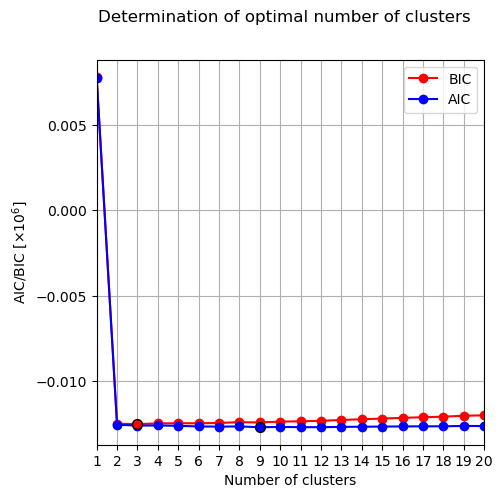

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# axs = axs.ravel()
plt.subplots_adjust(hspace = 0.3, wspace=0.3)

axs.plot(n_clusters, np.array(bic_gmm)/10**6, 'r-o', label='BIC')
axs.plot(n_clusters, np.array(aic_gmm)/10**6, 'b-o', label='AIC')
axs.scatter(n_clusters[np.argmin(aic_gmm)], aic_gmm[np.argmin(aic_gmm)]/10**6, 50, color='blue', ec='k', zorder=10000)
axs.scatter(n_clusters[np.argmin(bic_gmm)], bic_gmm[np.argmin(bic_gmm)]/10**6, 50, color='red', ec='k', zorder=10000)

axs.set_xticks(n_clusters)
axs.set_xlabel('Number of clusters')
axs.set_xlim(1,20)
axs.grid()
axs.set_ylabel(r'AIC/BIC [$\times10^6$]')
axs.legend()

plt.suptitle('Determination of optimal number of clusters', fontsize=12)
plt.show()

In [13]:
# Note: Optimal n is 1 less than the actual number of clusters, so n_optimal = 2 implies 3 clusters, etc. 
n_optimal = 2

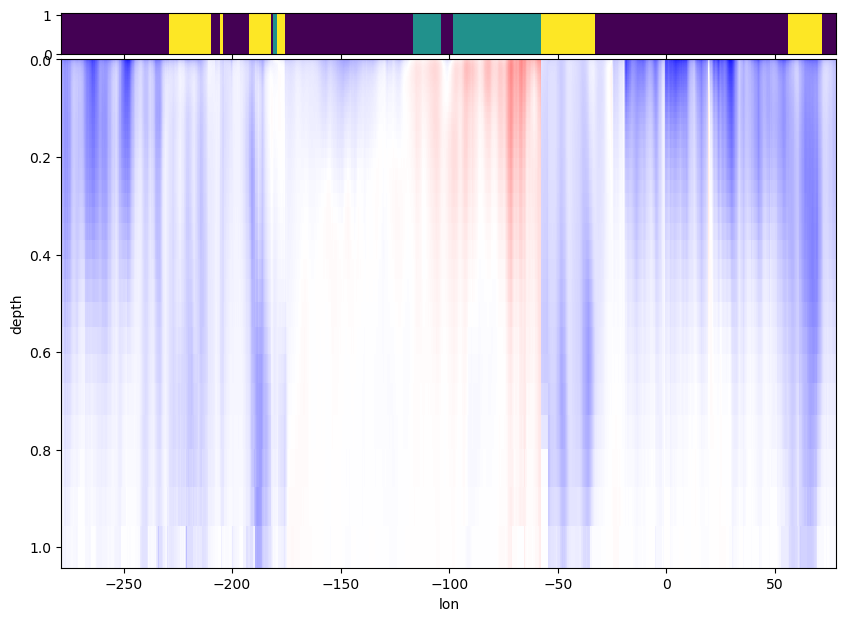

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,12*0.6), gridspec_kw={'height_ratios': [0.08,1]})
axs = axs.ravel()
plt.subplots_adjust(hspace = 0.02, wspace=0.02)

axs[0].pcolor(u_along_da_mean.lon_bin_midpoints.values , depth_bins, np.repeat(labels_gmm[n_optimal][:,np.newaxis], depth_bins.size, axis=-1).T)
u_along_da.plot(ax=axs[1], add_colorbar=False, vmin=-0.3, vmax=0.3, cmap=plt.cm.bwr)
axs[1].invert_yaxis()
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/GMM_ASC_trained.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
labels_gmm_seasons = []
for i in tqdm(range(12)):
    Y = result_seasons.isel(month=i).T
    gmm = GaussianMixture(n_components=3, random_state=42)
    labels_gmm_seasons.append(gmm.fit(X).predict(Y))

100%|██████████| 12/12 [00:00<00:00, 109.15it/s]


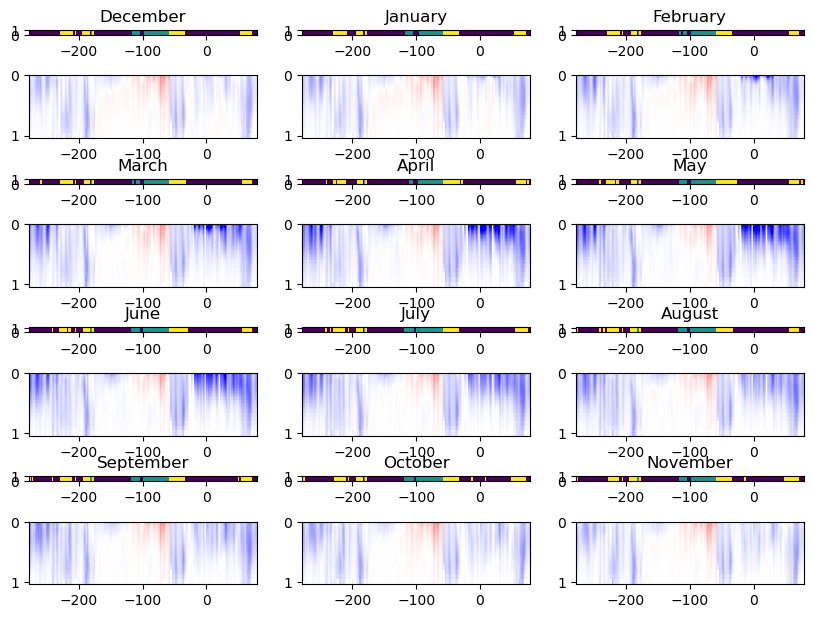

In [16]:
fig, axs = plt.subplots(nrows=8, ncols=3, figsize=(10,12*0.6), gridspec_kw={'height_ratios': [0.08,1,0.08,1,0.08,1,0.08,1]})
axs = axs.ravel()
plt.subplots_adjust(hspace = 1.2, wspace=0.2)

label_inds = [0,1,2,6,7,8,12,13,14,18,19,20]
vel_inds = [3,4,5,9,10,11,15,16,17,21,22,23]
seasons_inds = [11,0,1,2,3,4,5,6,7,8,9,10]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for j in range(12):
    axs[label_inds[j]].pcolor(u_along_da_mean.lon_bin_midpoints.values , depth_bins, np.repeat(labels_gmm_seasons[seasons_inds[j]][:,np.newaxis], depth_bins.size, axis=-1).T)
    u_along_da_seasons.isel(month=seasons_inds[j]).plot(ax=axs[vel_inds[j]], add_colorbar=False, vmin=-0.3, vmax=0.3, cmap=plt.cm.bwr)
    axs[vel_inds[j]].invert_yaxis()
    axs[label_inds[j]].set_title(months[seasons_inds[j]])
    axs[vel_inds[j]].set_title('')
    axs[vel_inds[j]].set_ylabel('')
    axs[label_inds[j]].set_ylabel('')
    axs[label_inds[j]].set_xlabel('')
    axs[vel_inds[j]].set_xlabel('')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/GMM_ASC_trained_seasons.png', dpi=300, bbox_inches='tight')
plt.show()

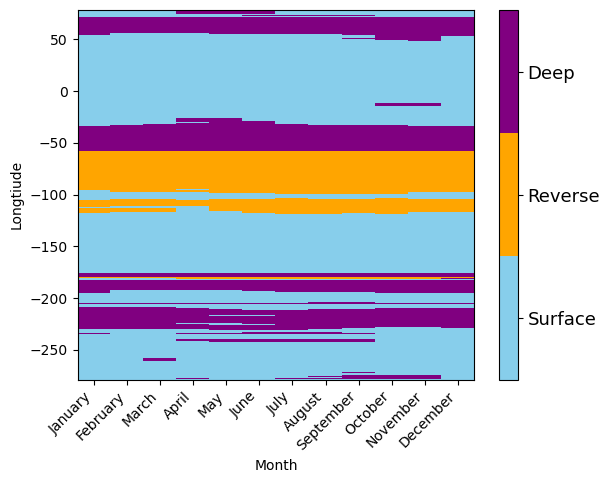

In [17]:
colors = ['skyblue', 'orange', 'purple']
values = [0, 1, 2]
classes = ['Surface', 'Reverse', 'Deep']
cmap = plt.cm.colors.ListedColormap(colors)

plt.pcolor(months,  u_along_da_mean.lon_bin_midpoints.values, np.array(labels_gmm_seasons).T, cmap=cmap)
plt.gca().set_xticklabels(months, rotation=45, ha='right')
cbar = plt.colorbar()
# cbar.set_label(r'Regime', fontsize=13, labelpad=5)
cbar.ax.tick_params(labelsize=13)
cbar.ax.set_yticks([1/3,1,5/3])
cbar.ax.set_yticklabels(classes)
plt.ylabel('Longtiude')
plt.xlabel('Month')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/GMM_ASC_trained_season_labels.png', dpi=300, bbox_inches='tight')
plt.show()

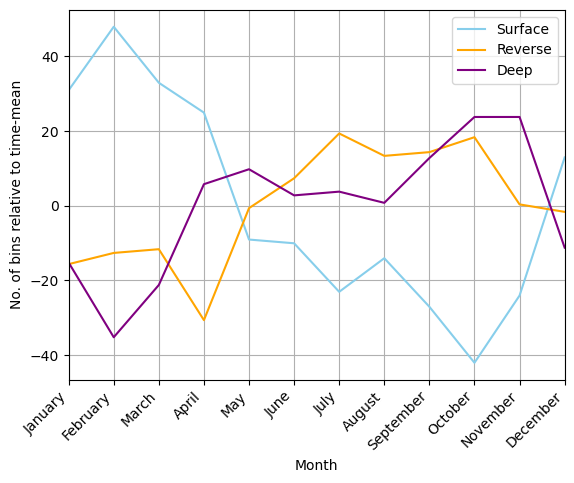

In [18]:
cnt_szn = np.zeros((3,12))
for j in range(3):
    for i in range(12):
        cnt_szn[j,i] = labels_gmm_seasons[i].tolist().count(j)

    plt.plot(cnt_szn[j,:]-np.nanmean(cnt_szn[j,:]), c = colors[j], label = classes[j])
plt.gca().set_xticks(np.arange(0,12))
plt.gca().set_xticklabels(months, rotation=45, ha='right')
plt.legend()
plt.grid()
plt.ylabel('No. of bins relative to time-mean')
plt.xlabel('Month')
plt.xlim(0,11)
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/labels_dist_seasonal.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
labels_gmm_annual = []
for i in tqdm(range(u_along_da_yearly.year.size)):
    Y = result_annual.isel(year=i).T
    gmm = GaussianMixture(n_components=3, random_state=42)
    labels_gmm_annual.append(gmm.fit(X).predict(Y))

100%|██████████| 61/61 [00:00<00:00, 99.25it/s] 


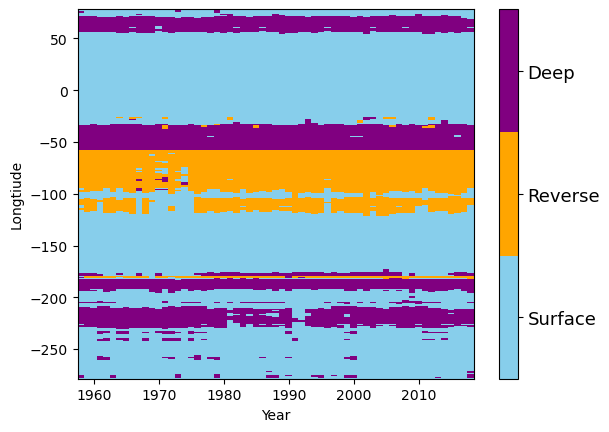

In [20]:
plt.pcolor(u_along_da_annual.year,  u_along_da_mean.lon_bin_midpoints.values, np.array(labels_gmm_annual).T, cmap=cmap)
# plt.gca().set_xticklabels(months, rotation=45, ha='right')
cbar = plt.colorbar()
# cbar.set_label(r'Regime', fontsize=13, labelpad=5)
cbar.ax.tick_params(labelsize=13)
cbar.ax.set_yticks([1/3,1,5/3])
cbar.ax.set_yticklabels(classes)
plt.ylabel('Longtiude')
plt.xlabel('Year')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/GMM_ASC_trained_annual_labels.png', dpi=300, bbox_inches='tight')
plt.show()

100%|██████████| 61/61 [00:00<00:00, 38901.10it/s]


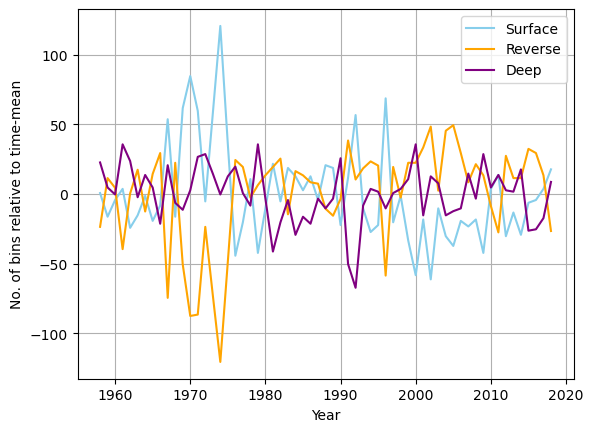

In [21]:
cnt_anno = np.zeros((3,u_along_da_yearly.year.size))
for j in range(3):
    for i in tqdm(range(u_along_da_yearly.year.size)):
        cnt_anno[j,i] = labels_gmm_annual[i].tolist().count(j)

    plt.plot(u_along_da_yearly.year, cnt_anno[j,:]-np.nanmean(cnt_anno[j,:]), c = colors[j], label = classes[j])
# plt.gca().set_xticks(np.arange(0,12))
# plt.gca().set_xticklabels(months, rotation=45, ha='right')
plt.legend()
plt.grid()
plt.ylabel('No. of bins relative to time-mean')
plt.xlabel('Year')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/labels_dist_annual.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
labels_gmm_months = []
for i in tqdm(range(u_along_da_monthly.time.size)):
    Y = result_months.isel(time=i).T
    gmm = GaussianMixture(n_components=3, random_state=42)
    labels_gmm_months.append(gmm.fit(X).predict(Y))

100%|██████████| 732/732 [00:07<00:00, 102.46it/s]


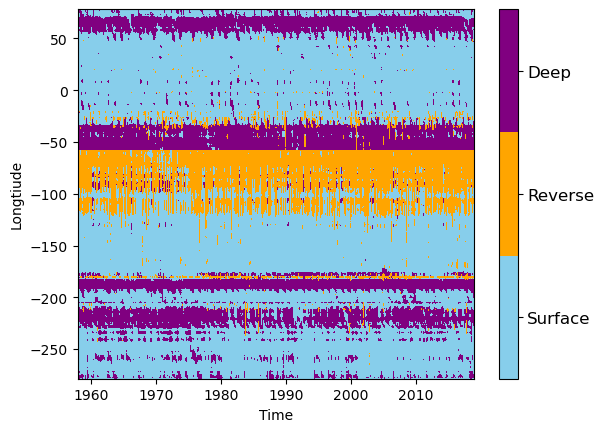

In [23]:
plt.pcolor(np.arange(u_along_da_months.time.size)/12+1958,  u_along_da_mean.lon_bin_midpoints.values, np.array(labels_gmm_months).T, cmap=cmap)
# plt.gca().set_xticklabels(months, rotation=45, ha='right')
cbar = plt.colorbar()
# cbar.set_label(r'Regime', fontsize=13, labelpad=5)
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticks([1/3,1,5/3])
cbar.ax.set_yticklabels(classes)
plt.ylabel('Longtiude')
plt.xlabel('Time')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/GMM_ASC_trained_monthly_labels.png', dpi=300, bbox_inches='tight')
plt.show()

100%|██████████| 732/732 [00:00<00:00, 40956.07it/s]


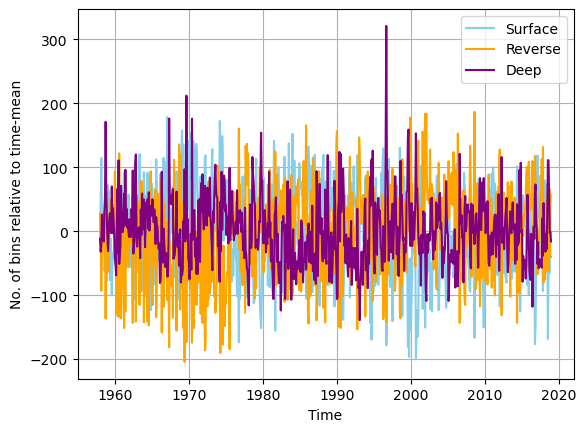

In [24]:
cnt_monthly = np.zeros((3,u_along_da_monthly.time.size))
for j in range(3):
    for i in tqdm(range(u_along_da_monthly.time.size)):
        cnt_monthly[j,i] = labels_gmm_months[i].tolist().count(j)

    plt.plot(np.arange(u_along_da_months.time.size)/12+1958, cnt_monthly[j,:]-np.nanmean(cnt_monthly[j,:]), c = colors[j], label = classes[j])
# plt.gca().set_xticks(np.arange(0,12))
# plt.gca().set_xticklabels(months, rotation=45, ha='right')
plt.legend()
plt.grid()
plt.ylabel('No. of bins relative to time-mean')
plt.xlabel('Time')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/labels_dist_monthly.png', dpi=300, bbox_inches='tight')
plt.show()

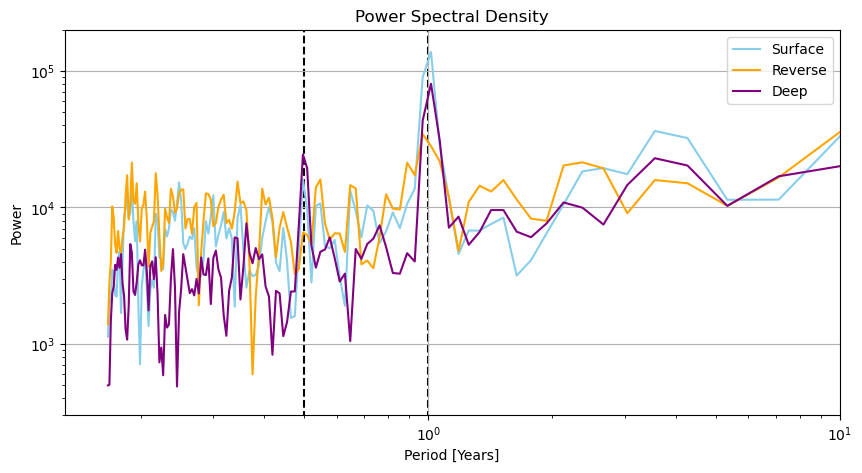

In [25]:
from scipy import signal
# Plot the power spectral density
plt.figure(figsize=(10, 5))

for j in range(3):
    # Compute the power spectral density
    frequencies, psd = signal.welch(cnt_monthly[j,:], fs=1)
    plt.loglog(1/frequencies/12, psd, c = colors[j], label = classes[j])

plt.title('Power Spectral Density')
plt.vlines(0.5,1e2,1e6, color='black', linestyle='dashed', zorder=-1)
plt.vlines(1,1e2,1e6, color='black', linestyle='dashed', zorder=-1)

plt.ylim(3e2,2e5)
plt.xlabel('Period [Years]')
plt.ylabel('Power')
plt.xlim(0,10)
plt.grid()
plt.legend()
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/monthly_power_spectra.png', dpi=300, bbox_inches='tight')
plt.show()

## Split along contour into 5deg lon/lat bin


In [26]:
# Define bin edges for 5-degree bins
lon_bin=5
# defined 2 'bin_edges', one for da with dim='lon_bin_midpoints' and other for dim='lon'
bin_edges = np.arange(u_along_da_mean.lon_bin_midpoints[0], u_along_da_mean.lon_bin_midpoints[-1], lon_bin)
bin_edges2 = np.arange(u_along_da_seasons.lon[0], u_along_da_seasons.lon[-1], lon_bin)

# Group longitudes into 5-degree bins
ds = u_along_da_mean
u_along_da_mean_binned = ds.groupby_bins('lon_bin_midpoints', bins=bin_edges).mean()

# repeat Binning for _seasons (bin_edges2), _annua (bin_edges2), _months (bin_edges2)
ds = u_along_da_seasons
u_along_da_seasons_binned = ds.groupby_bins('lon', bins=bin_edges2).mean()

ds = u_along_da_months
u_along_da_months_binned = ds.groupby_bins('lon', bins=bin_edges2).mean()

ds = u_along_da_annual
u_along_da_annual_binned = ds.groupby_bins('lon_bin_midpoints', bins=bin_edges).mean()

#load 
u_along_da_mean_binned.load()
u_along_da_seasons_binned.load()
u_along_da_months_binned.load()
u_along_da_annual_binned.load()

<xarray.DataArray 'u_along_contour_binned' (year: 61, st_ocean: 75,
                                            lon_bin_midpoints_bins: 71)>
array([[[-0.14103416, -0.13426226, -0.1990108 , ..., -0.1737091 ,
         -0.18330934, -0.09336605],
        [-0.12793666, -0.12006745, -0.18831344, ..., -0.1541763 ,
         -0.16890616, -0.08171194],
        [-0.12087733, -0.11205782, -0.18214691, ..., -0.1434363 ,
         -0.16039483, -0.075101  ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.13071278, -0.11036583, -0.17086287, ..., -0.16436589,
         -0.15811947, -0.09103481],
        [-0.11721137, -0.09553825, -0.16015286, ..., -0.14611526,
         -0.14439215, -0.07977431],
        [-0.11000579, -0.08729582, -0.15407291, ..., -0.13613011,
         -0.13631046, -0.07328603],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.12416687, -0.11704302, -0.18752271, ..., -0.18903834,
         -0.20194549, -0.09367531],
        [-0.10957635, -0.1020654 , -0.17647539, ..., -0.17110927,
         -0.1894172 , -0.08196426],
        [-0.10175995, -0.09374187, -0.17010492, ..., -0.16121677,
         -0.18202252, -0.07527302],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * st_ocean                (st_ocean) float64 0.5413 1.681 ... 5.709e+03
  * year                    (year) int64 1958 1959 1960 1961 ... 2016 2017 2018
  * lon_bin_midpoints_bins  (lon_bin_midpoints_bins) object (-278.5, -273.5] ...

In [76]:
# Group longitudes into 5-degree bins for depth array"
ds = depthT
depthT_binned = ds.groupby_bins('lon_bin_midpoints', bins=bin_edges).mean()


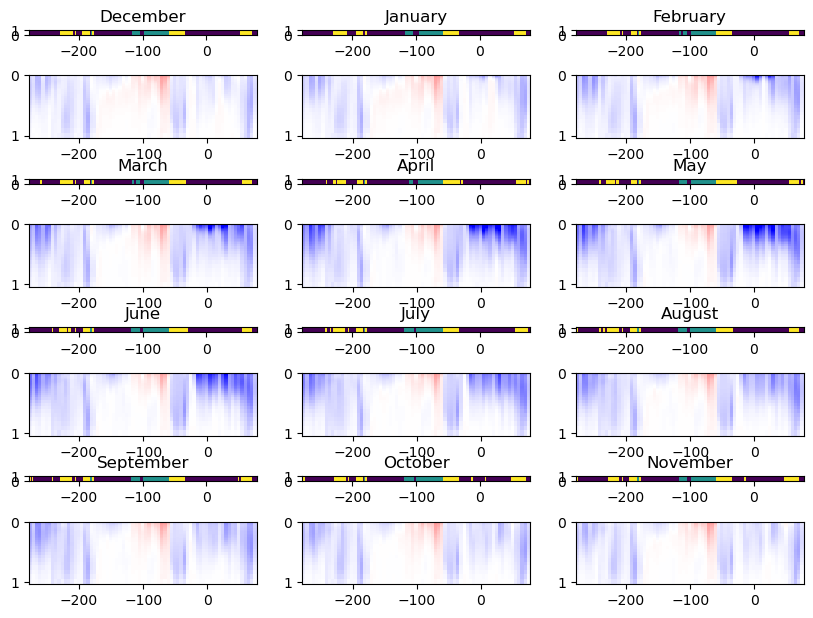

In [27]:
fig, axs = plt.subplots(nrows=8, ncols=3, figsize=(10,12*0.6), gridspec_kw={'height_ratios': [0.08,1,0.08,1,0.08,1,0.08,1]})
axs = axs.ravel()
plt.subplots_adjust(hspace = 1.2, wspace=0.2)

label_inds = [0,1,2,6,7,8,12,13,14,18,19,20]
vel_inds = [3,4,5,9,10,11,15,16,17,21,22,23]
seasons_inds = [11,0,1,2,3,4,5,6,7,8,9,10]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for j in range(12):
    axs[label_inds[j]].pcolor(u_along_da_seasons.lon, depth_bins, np.repeat(labels_gmm_seasons[seasons_inds[j]][:,np.newaxis], depth_bins.size, axis=-1).T)
    u_along_da_seasons_binned.isel(month=seasons_inds[j]).plot(ax=axs[vel_inds[j]], add_colorbar=False, vmin=-0.3, vmax=0.3, cmap=plt.cm.bwr)
    axs[vel_inds[j]].invert_yaxis()
    axs[label_inds[j]].set_title(months[seasons_inds[j]])
    axs[vel_inds[j]].set_title('')
    axs[vel_inds[j]].set_ylabel('')
    axs[label_inds[j]].set_ylabel('')
    axs[label_inds[j]].set_xlabel('')
    axs[vel_inds[j]].set_xlabel('')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/GMM_ASC_trained_seasons_5degBins.png', dpi=300, bbox_inches='tight')
plt.show()

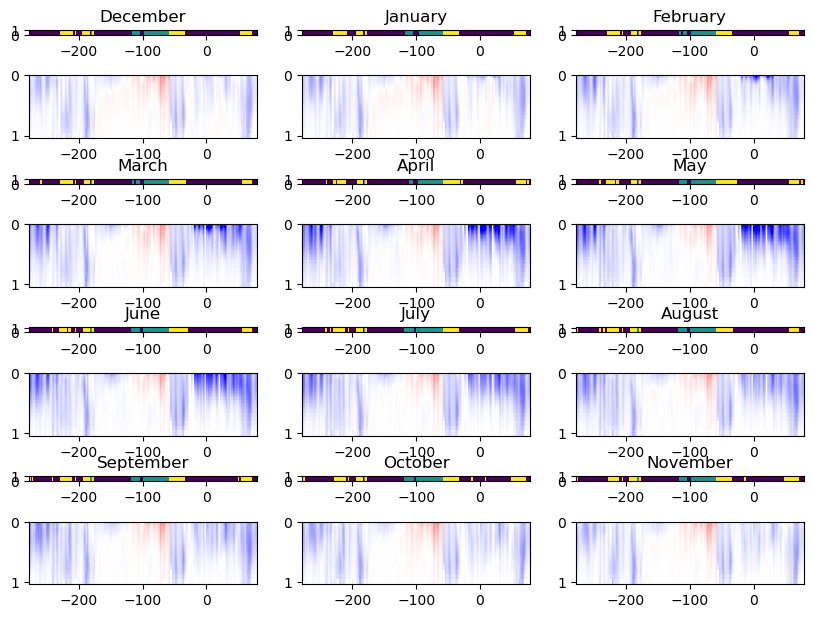

In [28]:
fig, axs = plt.subplots(nrows=8, ncols=3, figsize=(10,12*0.6), gridspec_kw={'height_ratios': [0.08,1,0.08,1,0.08,1,0.08,1]})
axs = axs.ravel()
plt.subplots_adjust(hspace = 1.2, wspace=0.2)

label_inds = [0,1,2,6,7,8,12,13,14,18,19,20]
vel_inds = [3,4,5,9,10,11,15,16,17,21,22,23]
seasons_inds = [11,0,1,2,3,4,5,6,7,8,9,10]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for j in range(12):
    axs[label_inds[j]].pcolor(u_along_da_seasons.lon, depth_bins, np.repeat(labels_gmm_seasons[seasons_inds[j]][:,np.newaxis], depth_bins.size, axis=-1).T)
    u_along_da_seasons.isel(month=seasons_inds[j]).plot(ax=axs[vel_inds[j]], add_colorbar=False, vmin=-0.3, vmax=0.3, cmap=plt.cm.bwr)
    axs[vel_inds[j]].invert_yaxis()
    axs[label_inds[j]].set_title(months[seasons_inds[j]])
    axs[vel_inds[j]].set_title('')
    axs[vel_inds[j]].set_ylabel('')
    axs[label_inds[j]].set_ylabel('')
    axs[label_inds[j]].set_xlabel('')
    axs[vel_inds[j]].set_xlabel('')
# plt.savefig('/g/data/e14/txs156/Analysis/ACCESS-OM2/Clustering/ASC_and_heat_transport/Figures/GMM_ASC_trained_seasons.png', dpi=300, bbox_inches='tight')
plt.show()

## Assess u_along and CSHT in regimes

In [29]:
## Convert the mask with label numbers to an array
labels_masks = np.ones((3, np.array(labels_gmm_months).shape[0], np.array(labels_gmm_months).shape[1]))*np.nan

for i in range(3):
    labels_masks[i,:,:] = np.ma.where(np.array(labels_gmm_months)==i, 1, np.nan)

clustering_mask = xr.DataArray(labels_masks, dims = {'regime':np.arange(3).size, 'time':u_along_da_months.time.size, \
                                                     'lon':u_along_da_months.lon.size}, coords = {'regime':classes, 'time':u_along_da_months.time, \
                                                     'lon':u_along_da_months.lon})

In [30]:
masked_u_along = u_along_da_monthly.rename({'st_ocean':'depth', 'lon_bin_midpoints':'lon'})*clustering_mask
masked_u_along.load()

<xarray.DataArray (time: 732, depth: 75, lon: 1428, regime: 3)>
array([[[[        nan,         nan, -0.02359511],
         [        nan,         nan, -0.02475564],
         [        nan,         nan, -0.02657239],
         ...,
         [-0.0204653 ,         nan,         nan],
         [-0.02053152,         nan,         nan],
         [-0.02350026,         nan,         nan]],

        [[        nan,         nan, -0.01865366],
         [        nan,         nan, -0.01979311],
         [        nan,         nan, -0.02162974],
         ...,
         [-0.01303114,         nan,         nan],
         [-0.01375674,         nan,         nan],
         [-0.01694079,         nan,         nan]],

        [[        nan,         nan, -0.01603528],
         [        nan,         nan, -0.01716227],
         [        nan,         nan, -0.01901062],
         ...,
...
         ...,
         [        nan,         nan,         nan],
         [        nan,         nan,         nan],
         [        nan,         nan,         nan]],

        [[        nan,         nan,         nan],
         [        nan,         nan,         nan],
         [        nan,         nan,         nan],
         ...,
         [        nan,         nan,         nan],
         [        nan,         nan,         nan],
         [        nan,         nan,         nan]],

        [[        nan,         nan,         nan],
         [        nan,         nan,         nan],
         [        nan,         nan,         nan],
         ...,
         [        nan,         nan,         nan],
         [        nan,         nan,         nan],
         [        nan,         nan,         nan]]]])
Coordinates:
  * depth    (depth) float64 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.709e+03
  * lon      (lon) float64 -278.5 -278.2 -278.0 -277.8 ... 77.5 77.75 78.0 78.25
  * time     (time) datetime64[ns] 1958-01-31 1958-02-28 ... 2018-12-31
  * regime   (regime) <U7 'Surface' 'Reverse' 'Deep'

In [31]:
CSHT_along_monthly = CSHT_along.resample(time='1M').mean()
CSHT_months = ((CSHT_along_monthly.binned_cross_slope_heat_trans+CSHT_along_monthly.zonal_convergence)*0.08).rename({'st_ocean':'depth', 'lon_bin_midpoints':'lon'})

In [32]:
# Bin monthly CSHT into 5deg windows:
ds = CSHT_months
CSHT_months_binned = ds.groupby_bins('lon', bins=bin_edges2).mean()

CSHT_months_binned.load()

<xarray.DataArray (time: 732, depth: 75, lon_bins: 71)>
array([[[-2.45068122e+09, -8.91853530e+09,  8.27405518e+09, ...,
         -1.29149135e+10, -1.28428598e+10,  2.67192641e+09],
        [-5.96290147e+09, -9.64880285e+09,  5.19437945e+09, ...,
         -1.53836313e+10, -1.62818618e+10,  3.93620575e+09],
        [-8.72062452e+09, -1.02648630e+10,  2.98076361e+09, ...,
         -1.72284137e+10, -1.83014026e+10,  4.06576581e+09],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 4.36641720e+09, -1.18268988e+10,  9.33478128e+08, ...,
         -6.69774887e+09, -1.80242439e+09,  2.73721484e+09],
        [ 5.49047033e+08, -1.29368031e+10, -3.41678261e+09, ...,
         -9.18095862e+09, -6.76411516e+09,  3.01270698e+09],
        [-1.94948752e+09, -1.41311073e+10, -6.60474279e+09, ...,
         -1.08902897e+10, -1.00121058e+10,  3.11498044e+09],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 7.34156522e+08, -9.43511197e+09,  2.91439645e+09, ...,
         -4.19261436e+09, -4.32504028e+09,  2.50426347e+09],
        [-1.42286974e+09, -1.00708558e+10,  8.21009218e+08, ...,
         -5.67874803e+09, -6.21833059e+09,  3.12662848e+09],
        [-3.02411440e+09, -1.06452701e+10, -3.97503113e+08, ...,
         -6.80848509e+09, -7.38982268e+09,  3.41626931e+09],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * depth     (depth) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 1958-01-31 1958-02-28 ... 2018-12-31
  * lon_bins  (lon_bins) object (-278.5, -273.5] ... (71.5, 76.5]

## calculating correlations for binned along-slope velocies/CSHT

In [33]:
## Average over different time scales to get depth-based correlations

CSHT_annual_binned = CSHT_months_binned.groupby('time.year').mean('time')
U_along_annual_binned = u_along_da_months_binned.groupby('time.year').mean('time')

CSHT_clima_binned = CSHT_months_binned.groupby('time.month').mean('time')
U_along_clima_binned = u_along_da_months_binned.groupby('time.month').mean('time')
                       
CSHT_layerwise_binned = CSHT_months_binned
U_along_layerwise_binned = u_along_da_months_binned

In [34]:
# get time-mean regimes mask

ds = xr.open_dataset('/g/data/v45/txs156/ASC_classification/clustering_mask_time_mean.nc')
# ds.regimes_mask.plot()

# Bin into 5deg windows:
regimes_mask_binned = ds.groupby_bins('lon', bins=bin_edges2).mean()
regimes_mask_binned.regimes_mask.load()

# plt.pcolormesh(regimes_mask_binned.regimes_mask.transpose()) # overlapping???



<xarray.DataArray 'regimes_mask' (lon_bins: 71, regime: 3)>
array([[ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan,  1.],
       [nan, nan,  1.],
       [nan, nan,  1.],
       [nan, nan,  1.],
       [ 1., nan,  1.],
       [ 1., nan,  1.],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan,  1.],
       [nan, nan,  1.],
       [ 1.,  1.,  1.],
...
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan, nan],
       [ 1., nan,  1.],
       [nan, nan,  1.],
       [nan, nan,  1.],
       [nan, nan,  1.],
       [ 1., nan,  1.]])
Coordinates:
  * regime    (regime) <U7 'Surface' 'Reverse' 'Deep'
  * lon_bins  (lon_bins) object (-278.5, -273.5] ... (71.5, 76.5]

In [35]:
%%time

# Calculate the regression slope and r^2 for these longitude bins,
# using the U/CSHT*regime masks (averaged over each regime done below before plotting)

# [loop on i(lon_bins) and j(v-levs)]

slope_all = np.zeros((u_along_da_months_binned.depth.size, 71, 3))
stderr_all = np.zeros((u_along_da_months_binned.depth.size, 71, 3))
r_sq_all = np.zeros((u_along_da_months_binned.depth.size, 71, 3))
slope_annual = np.zeros((u_along_da_months_binned.depth.size, 71, 3))
stderr_annual = np.zeros((u_along_da_months_binned.depth.size, 71, 3))
r_sq_annual = np.zeros((u_along_da_months_binned.depth.size, 71, 3))

# slope_deseasoned = np.zeros((u_along_da_months_binned.depth.size, 71))
# stderr_deseasoned = np.zeros((u_along_da_months_binned.depth.size, 71))
# r_sq_deseasoned = np.zeros((u_along_da_months_binned.depth.size, 71))
slope_clima = np.zeros((u_along_da_months_binned.depth.size, 71, 3))
stderr_clima = np.zeros((u_along_da_months_binned.depth.size, 71, 3))
r_sq_clima = np.zeros((u_along_da_months_binned.depth.size, 71, 3))

for rr in range(3):
    for i in range(71):
        for j in range(u_along_da_months_binned.depth.size):
            mask_regime_tmp = regimes_mask_binned.regimes_mask.isel(regime=rr, lon_bins=i)
            
            slope_all[j,i,rr] = stats.linregress(U_along_layerwise_binned[:,j,i]*mask_regime_tmp, CSHT_layerwise_binned[:,j,i]*mask_regime_tmp/1e12).slope
            stderr_all[j,i,rr] = stats.linregress(U_along_layerwise_binned[:,j,i]*mask_regime_tmp, CSHT_layerwise_binned[:,j,i]*mask_regime_tmp/1e12).stderr
            r_sq_all[j,i,rr] = stats.linregress(U_along_layerwise_binned[:,j,i]*mask_regime_tmp, CSHT_layerwise_binned[:,j,i]*mask_regime_tmp/1e12).rvalue**2
        
            slope_annual[j,i,rr] = stats.linregress(U_along_annual_binned[:,j,i]*mask_regime_tmp, CSHT_annual_binned[:,j,i]*mask_regime_tmp/1e12).slope
            stderr_annual[j,i,rr] = stats.linregress(U_along_annual_binned[:,j,i]*mask_regime_tmp, CSHT_annual_binned[:,j,i]*mask_regime_tmp/1e12).stderr
            r_sq_annual[j,i,rr] = stats.linregress(U_along_annual_binned[:,j,i]*mask_regime_tmp, CSHT_annual_binned[:,j,i]*mask_regime_tmp/1e12).rvalue**2

            slope_clima[j,i,rr] = stats.linregress(U_along_clima_binned[:,j,i]*mask_regime_tmp, CSHT_clima_binned[:,j,i]*mask_regime_tmp/1e12).slope
            stderr_clima[j,i,rr] = stats.linregress(U_along_clima_binned[:,j,i]*mask_regime_tmp, CSHT_clima_binned[:,j,i]*mask_regime_tmp/1e12).stderr
            r_sq_clima[j,i,rr] = stats.linregress(U_along_clima_binned[:,j,i]*mask_regime_tmp, CSHT_clima_binned[:,j,i]*mask_regime_tmp/1e12).rvalue**2


CPU times: user 8min 10s, sys: 8.33 s, total: 8min 19s
Wall time: 8min 11s


In [116]:
# # same for the depth variable

# depthT_binned_sfc = np.empty(depthT_binned.shape)
# depthT_binned_rev = np.empty(depthT_binned.shape)
# depthT_binned_deep = np.empty(depthT_binned.shape)

# for i in range(71):
#     for kk in range(50):
#         depthT_binned_sfc[kk,:] = depthT_binned[kk,i]*regimes_mask_binned.regimes_mask.isel(regime=0, lon_bins=i).transpose()
#         depthT_binned_rev[kk,:] = depthT_binned[kk,i]*regimes_mask_binned.regimes_mask.isel(regime=1, lon_bins=i)
#         depthT_binned_deep[kk,:] = depthT_binned[kk,i]*regimes_mask_binned.regimes_mask.isel(regime=2, lon_bins=i)

# # print(depthT_binned_sfc.shape)

In [130]:
depth4plot = np.nanmean(depthT_binned, axis=1) # averaged over contour (binned)


(50, 3)

In [124]:
slope_annual_reg = np.nanmean(slope_annual, axis=1)
slope_all_reg = np.nanmean(slope_all, axis=1)
slope_clima_reg = np.nanmean(slope_clima, axis=1)


In [125]:
stderr_annual_reg = np.nanmean(stderr_annual, axis=1)
stderr_all_reg = np.nanmean(stderr_all, axis=1)
stderr_clima_reg = np.nanmean(stderr_clima, axis=1)


In [126]:
r_sq_annual_reg = np.nanmean(r_sq_annual, axis=1)
r_sq_all_reg = np.nanmean(r_sq_all, axis=1)
r_sq_clima_reg = np.nanmean(r_sq_clima, axis=1)


## Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


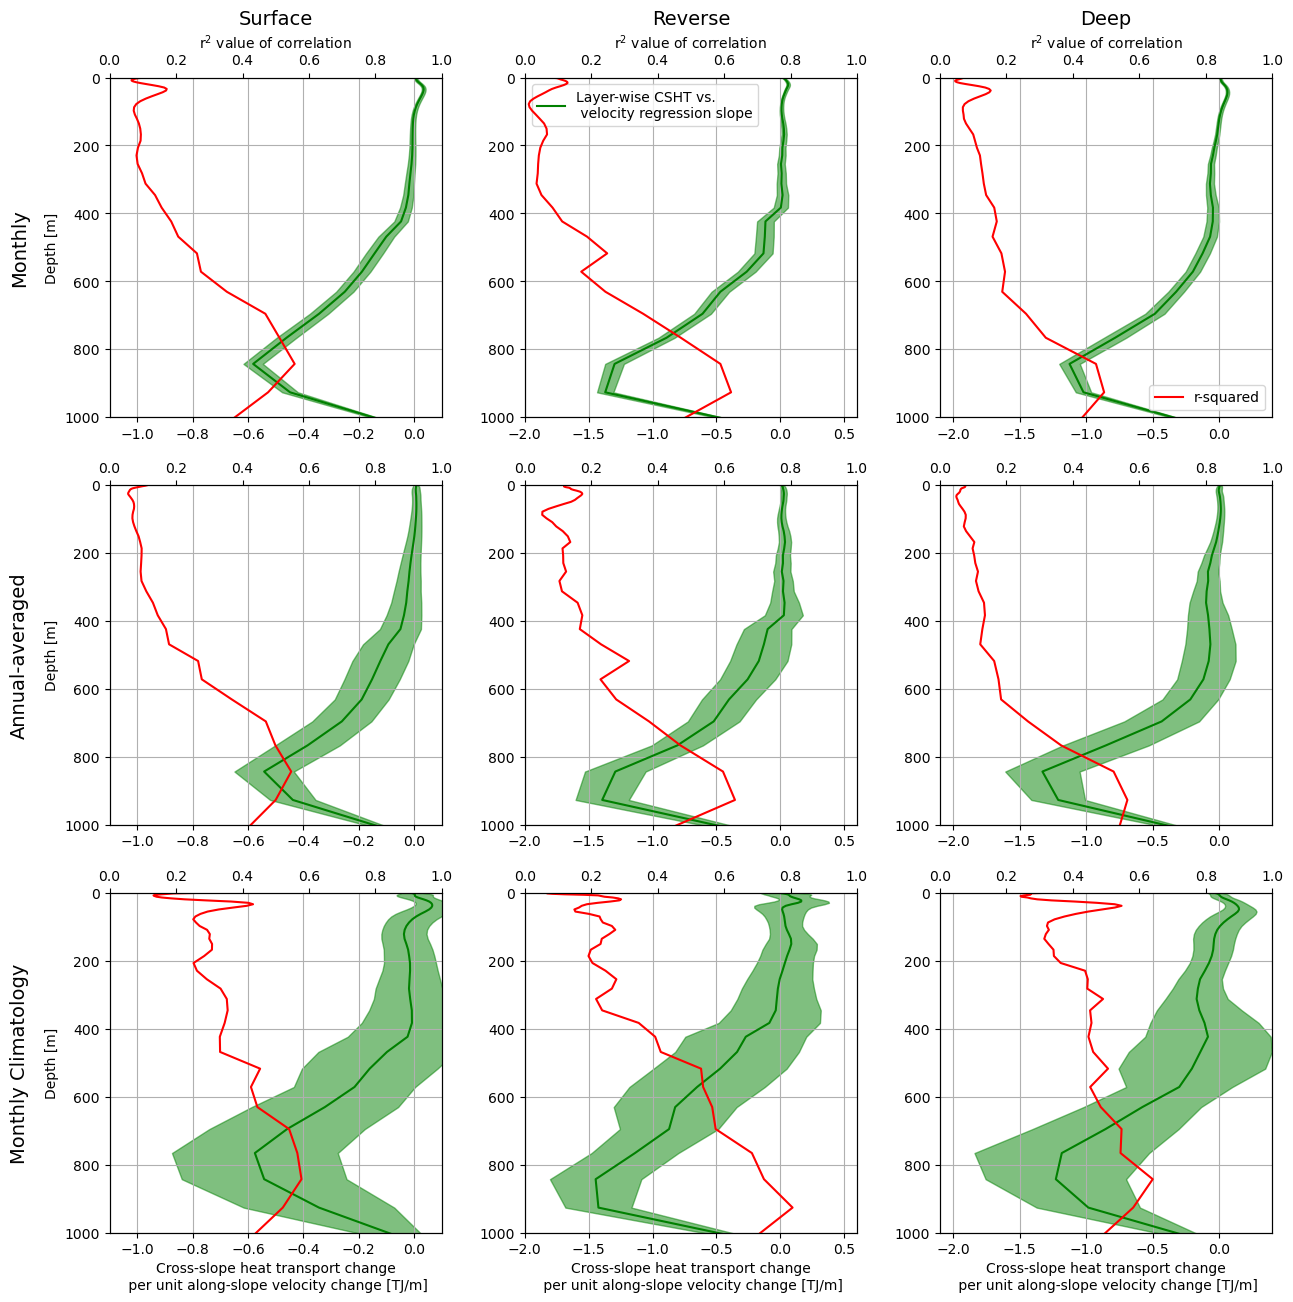

In [132]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs = axs.ravel()
plt.subplots_adjust(hspace = 0.2, wspace=0.25)

for i in range(3):
    axs[i+3].plot(slope_annual_reg[:,i], depth4plot, color='green', label = 'Layer-wise CSHT vs.\n velocity regression slope')
    axs[i+3].fill_betweenx( depth4plot,  slope_annual_reg[:,i]-stderr_annual_reg[:,i]*2, slope_annual_reg[:,i]+stderr_annual_reg[:,i]*2, alpha=0.5, color='green')
    axs[i].plot(slope_all_reg[:,i], depth4plot, color='green', label = 'Layer-wise CSHT vs.\n velocity regression slope')
    axs[i].fill_betweenx( depth4plot,  slope_all_reg[:,i]-stderr_all_reg[:,i]*2, slope_all_reg[:,i]+stderr_all_reg[:,i]*2, alpha=0.5, color='green')
    axs[i+6].plot(slope_clima_reg[:,i], depth4plot, color='green', label = 'Layer-wise CSHT vs.\n velocity regression slope')
    axs[i+6].fill_betweenx(depth4plot, slope_clima_reg[:,i]-stderr_clima_reg[:,i]*2, slope_clima_reg[:,i]+stderr_clima_reg[:,i]*2, alpha=0.5, color='green')

    axs[i].set_title(classes[i], fontsize=14)
    ax1 = axs[i].twiny()
    ax2 = axs[i+3].twiny()
    ax3 = axs[i+6].twiny()

    ax1.set_xlim(0,1)
    ax1.set_ylim(1000,0)
    ax1.set_xlabel('r$^2$ value of correlation')
    ax1.plot(r_sq_all_reg[:,i], depth4plot, 'r', label = 'r-squared')
    ax2.set_xlim(0,1)
    ax2.set_ylim(1000,0)
    ax2.plot(r_sq_annual_reg[:,i], depth4plot, 'r', label = 'r-squared')
    ax3.set_xlim(0,1)
    ax3.set_ylim(1000,0)
    ax3.plot(r_sq_clima_reg[:,i], depth4plot, 'r', label = 'r-squared')

    axs[0].set_ylabel('Depth [m]')
    axs[3].set_ylabel('Depth [m]')
    axs[6].set_ylabel('Depth [m]')

    axs[i+6].set_xlabel('Cross-slope heat transport change\n per unit along-slope velocity change [TJ/m]')
    axs[i].invert_yaxis()
    axs[i].set_ylim(1000,0)
    axs[3*i].set_xlim(-1.1,0.1)
    axs[3*i+1].set_xlim(-2,0.6)
    axs[3*i+2].set_xlim(-2.1,0.4)

    axs[i].grid()
    axs[i+3].invert_yaxis()
    axs[i+3].set_ylim(1000,0)
    axs[i+3].grid()
    axs[i+6].invert_yaxis()
    axs[i+6].set_ylim(1000,0)
    axs[i+6].grid()
    axs[1].legend()

axs[0].text(-0.3,0.5, 'Monthly', fontsize = 14, rotation=90, va= 'center', transform = axs[0].transAxes)
axs[6].text(-0.3,0.5, 'Monthly Climatology', fontsize = 14, rotation=90, va= 'center', transform = axs[6].transAxes)
axs[3].text(-0.3,0.5, 'Annual-averaged', fontsize = 14, rotation=90, va= 'center', transform = axs[3].transAxes)

ax1.legend(loc=4)
plt.savefig('/g/data/hh5/tmp/access-om/fbd581/ASC_project/ASC_and_heat_transport/figs/layer_wise_CSHT_vs_U_corr_5degBins.png', bbox_inches='tight', dpi=300)
plt.show()